<a href="https://colab.research.google.com/github/hoashalarajh/python-code/blob/main/CNN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Networks - Example

In [1]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


Shape of img is : (28, 28)


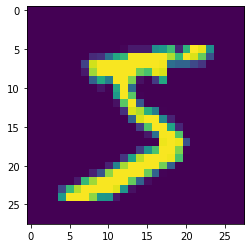

In [4]:
img = X_train[0]
print(f"Shape of img is : {img.shape}")
plt.imshow(img)

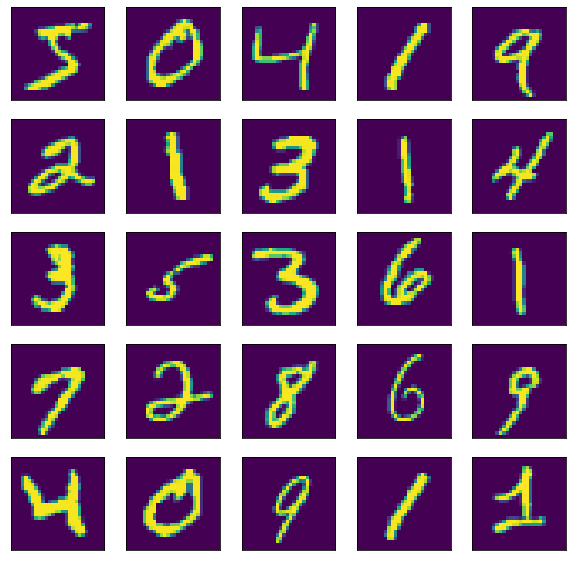

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
plt.show()

In [6]:
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

In [7]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1557 - accuracy: 0.9539
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0551 - accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0340 - accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0059 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.004

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [9]:
from keras_visualizer import visualizer
visualizer(model, format='png', view=True)

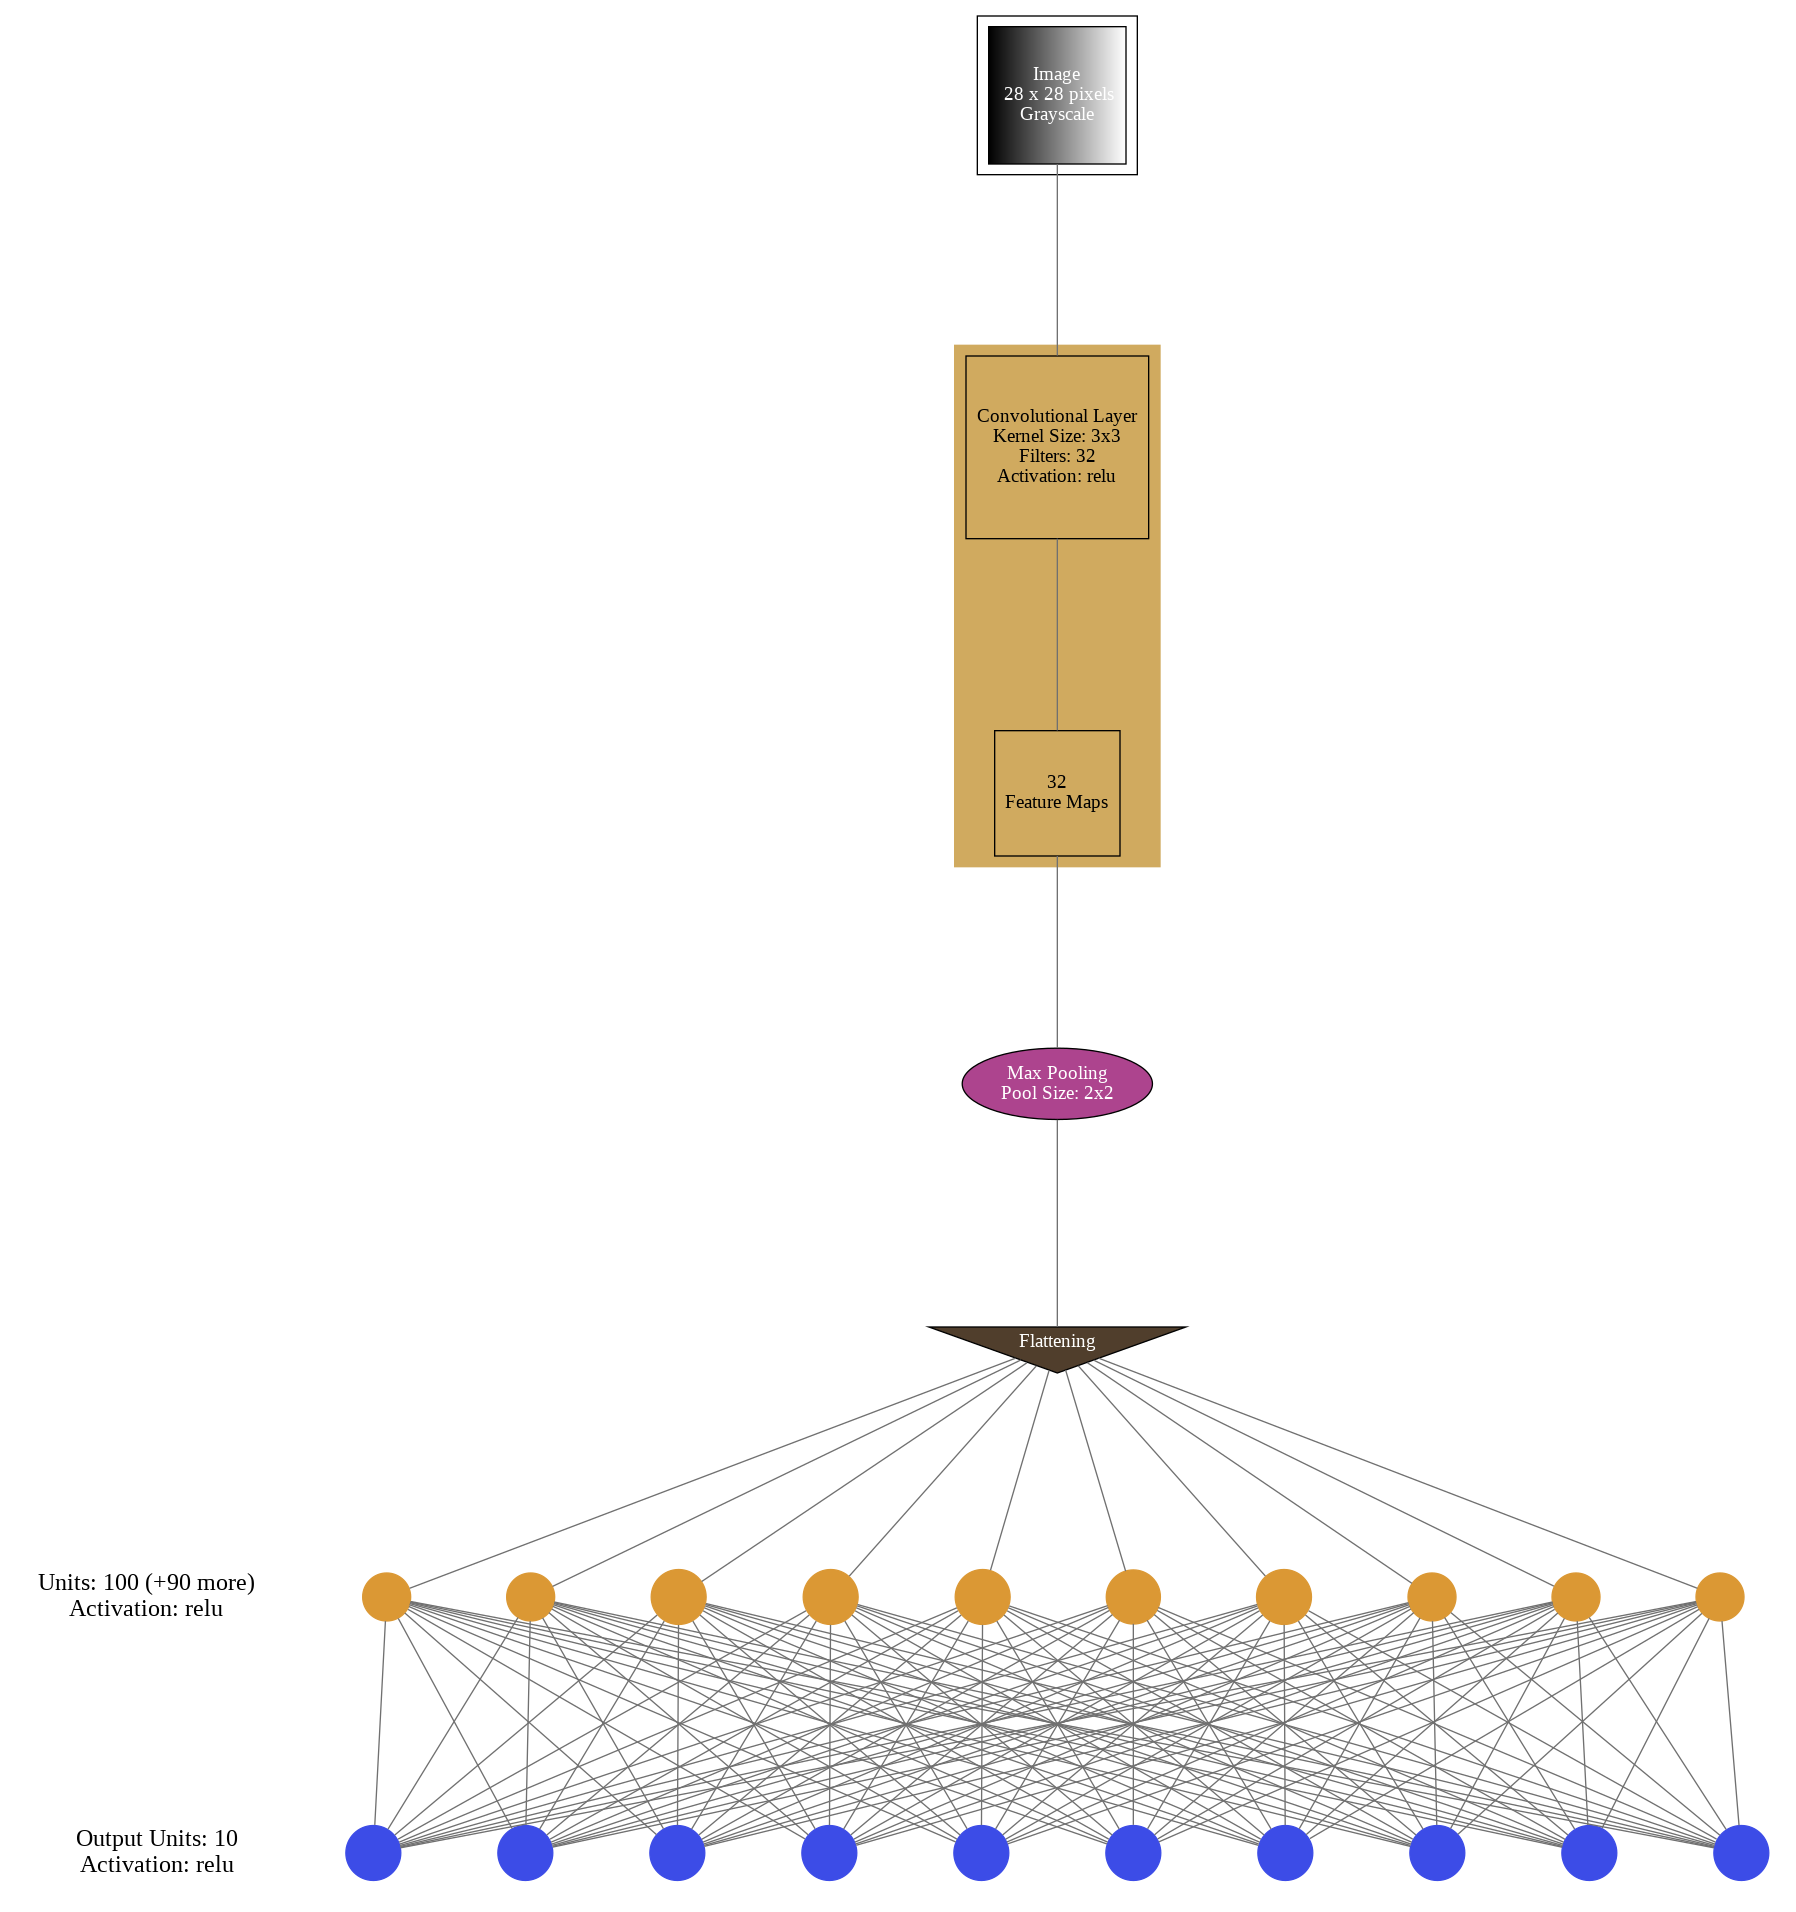

In [10]:
import cv2
from google.colab.patches import cv2_imshow
cnn_architecture = cv2.imread("graph.png")
cnn_architecture = cv2.cvtColor(cnn_architecture, cv2.COLOR_BGR2RGB)
cv2_imshow(cnn_architecture)

In [15]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
# Printiing the results
print (f"\nThe loss of the model is :{loss}\n")
print (f"The accuracy of the model is : {accuracy * 100}\n")

313/313 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9877

The loss of the model is :0.052055586129426956

The accuracy of the model is : 98.76999855041504

